## Нарезка данных для обучения

In [1]:
import numpy as np
import pandas as pd

C:\Users\mi\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\mi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_parquet("TSLA.parquet")
data = data.drop(["stock", "c", "h", "l", "o"], axis=1)

In [3]:
data.time = pd.to_datetime(data.time)
data = data.set_index("time")
data = data.head(15)

Допустим нужно предсказать значение моделью на основе 3 предыдущих значений. Для этого нам нужно представить наши данные в подобном виде. Мы проходимся окном из 3 значений по всему датасету и формируем X и Y


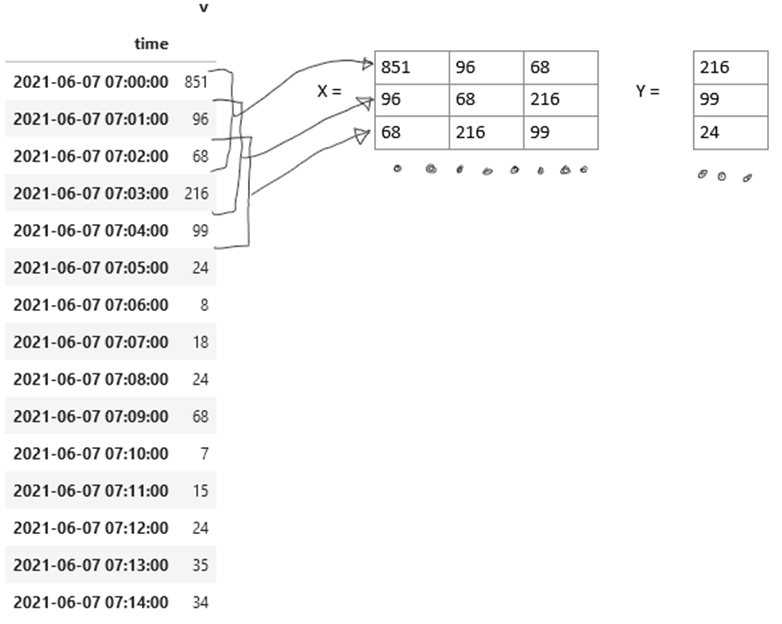

In [59]:
L = 3
X = np.array([data[i : i + L].to_numpy().flatten() for i in range(len(data) - L)])
X

array([[851,  96,  68],
       [ 96,  68, 216],
       [ 68, 216,  99],
       [216,  99,  24],
       [ 99,  24,   8],
       [ 24,   8,  18],
       [  8,  18,  24],
       [ 18,  24,  68],
       [ 24,  68,   7],
       [ 68,   7,  15],
       [  7,  15,  24],
       [ 15,  24,  35]])

In [61]:
Y = data[L:].to_numpy()
Y

array([[216],
       [ 99],
       [ 24],
       [  8],
       [ 18],
       [ 24],
       [ 68],
       [  7],
       [ 15],
       [ 24],
       [ 35],
       [ 34]])

Рассмотрим процесс в деталях

In [64]:
i = 0
data[i : i + L]

,v
time,
2021-06-07 07:00:00,851
2021-06-07 07:01:00,96
2021-06-07 07:02:00,68


In [65]:
data[i : i + L].to_numpy()

array([[851],
       [ 96],
       [ 68]])

In [66]:
data[i : i + L].to_numpy().flatten()

array([851,  96,  68])

In [67]:
[data[i : i + L].to_numpy().flatten() for i in range(len(data) - L)]

[array([851,  96,  68]),
 array([ 96,  68, 216]),
 array([ 68, 216,  99]),
 array([216,  99,  24]),
 array([99, 24,  8]),
 array([24,  8, 18]),
 array([ 8, 18, 24]),
 array([18, 24, 68]),
 array([24, 68,  7]),
 array([68,  7, 15]),
 array([ 7, 15, 24]),
 array([15, 24, 35])]

## Создание матриц

Создание матрицы из 5 строк и 3 столбцов

In [22]:
np.zeros((5, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

Матрица из 3 строк и 5 столбцов

In [23]:
np.ones((3, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

Округление значений

In [3]:
np.round(4.764212, 2)

4.76

In [7]:
np.ceil(4.764212)  # округляет до целого вверх

5.0

In [8]:
np.floor(4.764212)  # округляет до целого вниз

4.0

Создание случайной матрицы размером 3 на 4 из целых чисел в диапозоне от 0 до 20

In [99]:
Z = np.random.randint(0, 20, (3, 4))
Z

array([[13,  7, 18,  4],
       [ 8,  4,  3,  0],
       [19,  4, 17, 15]])

In [100]:
Z.min(axis=1)

array([4, 0, 4])

In [101]:
Z.argmin(axis=1)

array([3, 3, 1], dtype=int64)

In [102]:
Z.max(axis=1)

array([18,  8, 19])

In [103]:
Z.argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [104]:
Z.sort(axis=1)
Z

array([[ 4,  7, 13, 18],
       [ 0,  3,  4,  8],
       [ 4, 15, 17, 19]])

Операции над векторами и матрицами

In [127]:
A = np.random.randint(0, 20, 10)
A

array([ 8, 18, 13, 16,  9, 15,  2, 12, 17,  7])

In [128]:
B = np.random.randint(0, 20, 10)
B

array([18, 17,  6,  9,  1,  3, 14, 14, 12, 17])

In [129]:
A * B

array([144, 306,  78, 144,   9,  45,  28, 168, 204, 119])

In [130]:
A + B

array([26, 35, 19, 25, 10, 18, 16, 26, 29, 24])

In [131]:
A > B

array([False,  True,  True,  True,  True,  True, False, False,  True,
       False])